In [1]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
import datetime
import pandas as pd
import sys
!{sys.executable} -m pip install tqdm
from dasquakes import *
import obspy
import os
from run_pca_one import *


#fix the problem with tqdm

# 1. Choose the following parameters to select data to examine

In [2]:
cable='whidbey'
record_length = 5  #minutes
t0 = datetime.datetime(2022,7, 15, 7, 0, 0)

# 2. Run the functions to return the data

In [3]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [4]:
nt = data.shape[0]
nx = data.shape[1]
#print(f'Number of time steps: {nt}, Number of channels: {nx}')
#print(nt)
#print(nx)
#print(data.shape)
#print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

# 4. Make a simple plot of the data

Text(0, 0.5, 'Time Step')

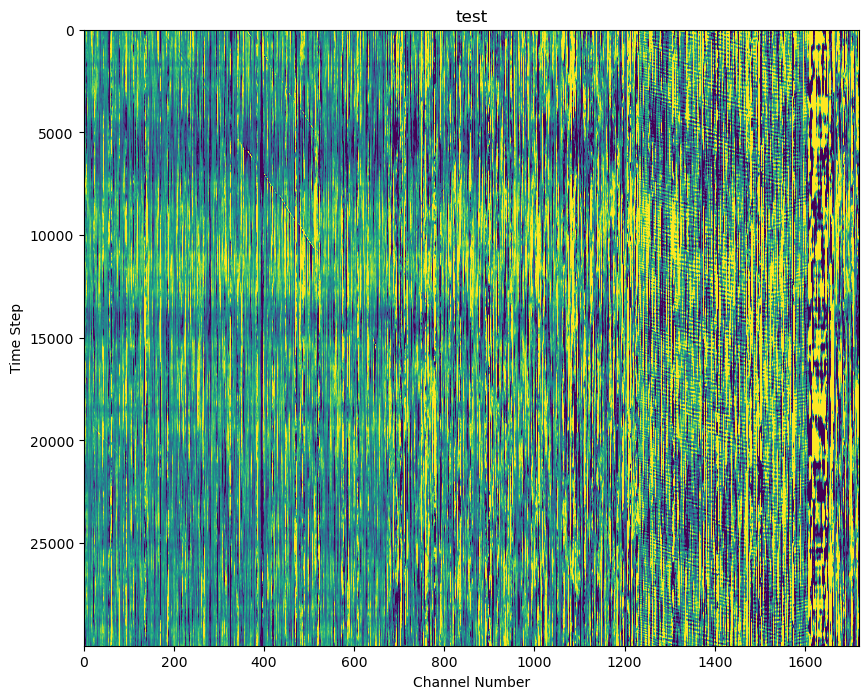

In [5]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.title('test')
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
#plt.savefig('5test.pdf', format="pdf")
#plt.show()
#my own to do
#save 2 different images in PNG, THEN COMPARE THAT (DIFFERENT TIME_LENGHT 1 MIN Y 5 MIN), ready 
#save lo mismo pero 1 mes después.
#save lo mismo un mes después.

# Calculate fourier transform.

In [6]:
#fk_anaylisis is a function that return, f frecuency, number of wave k, and ft.
ft,f,k = fk_analysis(t0,draw_figure=False, cable = 'whidbey', record_length = 2)
#ft = fftshift(fft2(downsampled_subsea_data))
# f = fftshift(fftfreq(downsampled_subsea_data.shape[0], d=0.01 * downsamplefactor)), relate with time step (nt)
# k=   k = fftshift(fftfreq(downsampled_subsea_data.shape[1], d=attrs['SpatialSamplingInterval'])) related with channels
#print(ft)
#print(f.shape)
#print(f)


Text(0, 0.5, 'Frequency (Hz)')

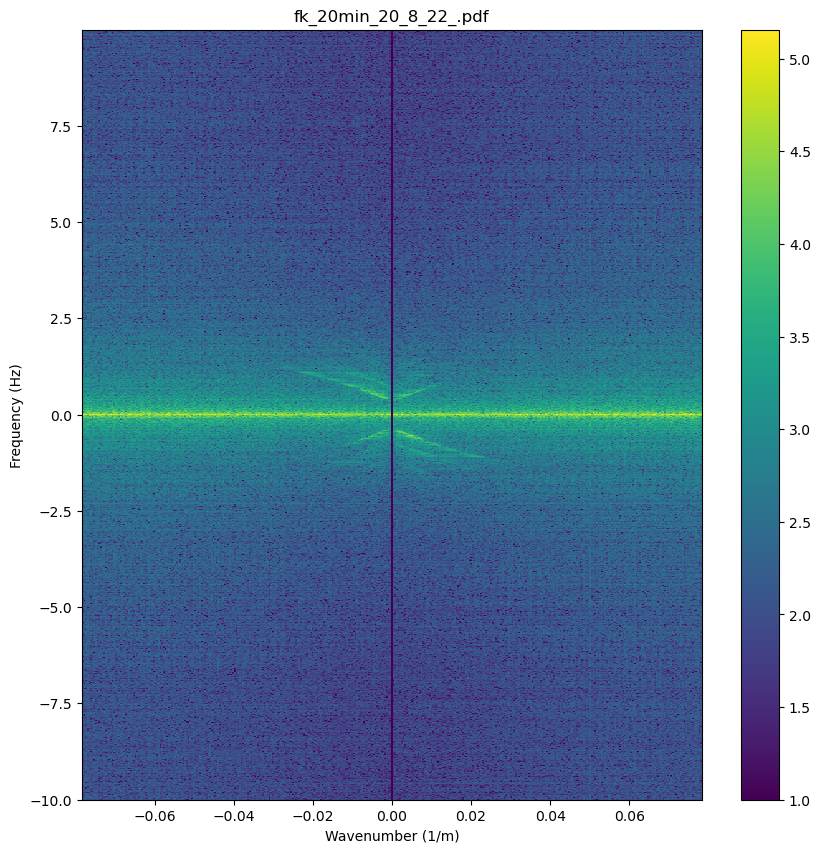

In [7]:
#creating fk plot for t0
plt.subplots(figsize=(10,10))
c=plt.pcolormesh(k,f,np.log10(np.abs(ft)),vmin=1)
plt.colorbar(c)
plt.title('fk_20min_20_8_22_.pdf')
plt.xlabel('Wavenumber (1/m)')
plt.ylabel('Frequency (Hz)')
#plt.savefig('fk_10min_5_8_22.pdf', format="pdf")

100%|██████████| 240/240 [02:16<00:00,  1.76it/s]


SVD runtime:   2.1939663626253605 s


ValueError: x and y must have same first dimension, but have shapes (240,) and (6,)

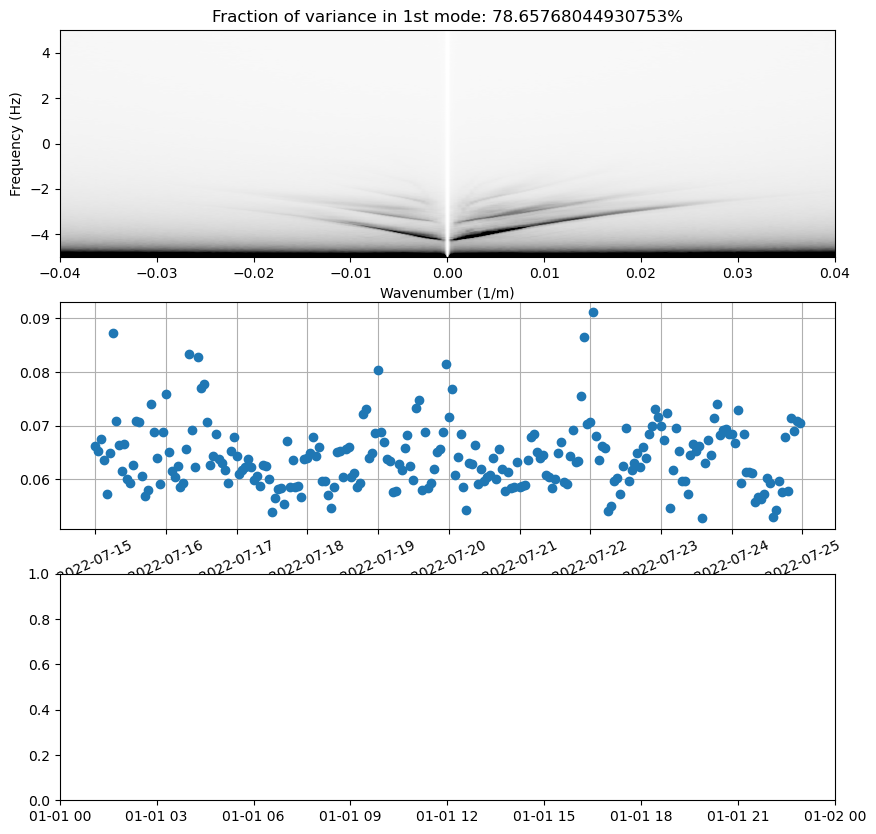

In [8]:

resultssvd2=main()




In [ ]:
#resultados para 10 dias, pca = PCA(n_components=d).fit(XX)

from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(S.transpose())
# The 3 PCs
print(pca.components_.transpose())
# The 3 PCs' explained variance
print(pca.explained_variance_)
#most of rhe variances are in the first direccion
S_pca = pca.transform(S)
print("original shape:   ", X.shape)
print(pca)
plt.scatter(S(0,:))
print("transformed shape:", X_pca.shape)

In [ ]:
# Find the azimuth of the displacement vector
X_new = pca.inverse_transform(X_pca)
print(X_new.shape)
plt.scatter(X[0,:], X[1,:], alpha=1)
plt.scatter(X_new[0,:], X_new[1,:], alpha=0.2)
plt.legend(['Original data','Reconstructed Data'])
plt.grid(True)
plt.show()